**Problem Set 1**

I am Loading the Diabetes dataset from sklearn and Split it into training (80%) and testing (20%) parts.

For the first question I split the data with a different way that, thaught in the class. But for the rest, I used the same technique. 

In [187]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
# import seaborn
import seaborn as sns
%matplotlib inline

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:int(-.2*diabetes_X.shape[0])]
print((diabetes_X_train.shape))
diabetes_X_test = diabetes_X[int(-.2*diabetes_X.shape[0]):]
print(len(diabetes_X_test))

# # Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:int(-.2*diabetes_X.shape[0])]
diabetes_y_test = diabetes_y[int(-.2*diabetes_X.shape[0]):]
print((diabetes_y_train.shape))
print((diabetes_y_test.shape))

(354, 10)
88
(354,)
(88,)


Using DataFrame for the data. And showing the result for example for X_test.

In [188]:
diabetes_X_train = pd.DataFrame(diabetes_X_train, columns = ['A','B','C','D','E','F','G','H','I','J'])
diabetes_X_test = pd.DataFrame(diabetes_X_test, columns = ['A','B','C','D','E','F','G','H','I','J'])

diabetes_y_train = pd.DataFrame(diabetes_y_train, columns = ['label'])
diabetes_y_test = pd.DataFrame(diabetes_y_test, columns = ['label'])
diabetes_X_test

,A,B,C,D,E,F,G,H,I,J
0,-0.023677,0.050680,0.045529,0.021872,0.109883,0.088873,0.000779,0.034309,0.074193,0.061054
1,-0.074533,0.050680,-0.009439,0.014987,-0.037344,-0.021669,-0.013948,-0.002592,-0.033249,0.011349
2,-0.005515,0.050680,-0.033151,-0.015999,0.008063,0.016222,0.015505,-0.002592,-0.028320,-0.075636
3,-0.060003,0.050680,0.049840,0.018429,-0.016704,-0.030124,-0.017629,-0.002592,0.049769,-0.059067
4,-0.020045,-0.044642,-0.084886,-0.026328,-0.035968,-0.034194,0.041277,-0.051671,-0.082381,-0.046641
...,...,...,...,...,...,...,...,...,...,...
83,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
84,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
85,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
86,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


**Add column of ones**

Now add a column of ones to X for easier matrix manipulation of our hypothesis and cost function later on. 

In [189]:
diabetes_X_test["Intercept"] = 1
diabetes_X_train["Intercept"] = 1
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
cross_tab = np.matmul(np.matrix.transpose(diabetes_X_train.values), diabetes_X_train.values)
cross_tab

array([[0.831145, 0.142308, 0.159918, 0.257529, 0.225069, 0.188774,
        -0.034304, 0.157329, 0.207618, 0.232650, 0.260063],
       [0.142308, 0.800452, 0.061975, 0.173611, -0.000857, 0.096661,
        -0.309510, 0.258148, 0.079271, 0.183943, -0.075050],
       [0.159918, 0.061975, 0.757806, 0.307323, 0.222875, 0.237738,
        -0.291233, 0.357209, 0.352310, 0.308502, -0.267624],
       [0.257529, 0.173611, 0.307323, 0.796524, 0.213421, 0.167943,
        -0.126681, 0.211341, 0.303888, 0.311877, 0.062917],
       [0.225069, -0.000857, 0.222875, 0.213421, 0.794976, 0.707667,
        0.044769, 0.433351, 0.409985, 0.276294, 0.077527],
       [0.188774, 0.096661, 0.237738, 0.167943, 0.707667, 0.791005,
        -0.173801, 0.536587, 0.255903, 0.247785, 0.095267],
       [-0.034304, -0.309510, -0.291233, -0.126681, 0.044769, -0.173801,
        0.835434, -0.624283, -0.306339, -0.233202, 0.156045],
       [0.157329, 0.258148, 0.357209, 0.211341, 0.433351, 0.536587,
        -0.624283, 0.84169

In [190]:
X = diabetes_X_train[["Intercept", 'A','B','C','D','E','F','G','H','I','J']].values
y = diabetes_y_train[["label"]].values

Xt = diabetes_X_test[["Intercept", 'A','B','C','D','E','F','G','H','I','J']].values
yt = diabetes_y_test[["label"]].values

Now I want to calculate through the direct mode.

---



---



$\Theta=(X^{T}X)^{-1}(X^{T}Y)$

In [191]:
XT_X = np.matmul(XT, X)
XT_X

array([[354.000000, 0.260063, -0.075050, -0.267624, 0.062917, 0.077527,
        0.095267, 0.156045, 0.014093, -0.066984, -0.228247],
       [0.260063, 0.831145, 0.142308, 0.159918, 0.257529, 0.225069,
        0.188774, -0.034304, 0.157329, 0.207618, 0.232650],
       [-0.075050, 0.142308, 0.800452, 0.061975, 0.173611, -0.000857,
        0.096661, -0.309510, 0.258148, 0.079271, 0.183943],
       [-0.267624, 0.159918, 0.061975, 0.757806, 0.307323, 0.222875,
        0.237738, -0.291233, 0.357209, 0.352310, 0.308502],
       [0.062917, 0.257529, 0.173611, 0.307323, 0.796524, 0.213421,
        0.167943, -0.126681, 0.211341, 0.303888, 0.311877],
       [0.077527, 0.225069, -0.000857, 0.222875, 0.213421, 0.794976,
        0.707667, 0.044769, 0.433351, 0.409985, 0.276294],
       [0.095267, 0.188774, 0.096661, 0.237738, 0.167943, 0.707667,
        0.791005, -0.173801, 0.536587, 0.255903, 0.247785],
       [0.156045, -0.034304, -0.309510, -0.291233, -0.126681, 0.044769,
        -0.173801, 0.835

In [192]:
XT = np.matrix.transpose(X)

In [193]:
XT_X_inv = np.linalg.inv(XT_X)
XT_X_inv

array([[0.002830, -0.001089, 0.000465, 0.001458, -0.000845, 0.010475,
        -0.007880, -0.005826, -0.003642, -0.003331, 0.001212],
       [-0.001089, 1.461256, -0.208485, -0.053855, -0.262176, 0.313990,
        -0.478855, -0.319551, 0.052926, -0.319057, -0.179472],
       [0.000465, -0.208485, 1.626795, 0.262824, -0.300050, 0.211181,
        -0.057438, 0.406755, -0.336723, 0.279871, -0.219074],
       [0.001458, -0.053855, 0.262824, 2.041989, -0.460931, 1.139085,
        -1.162852, 0.016235, -0.073180, -0.784282, -0.270025],
       [-0.000845, -0.262176, -0.300050, -0.460931, 1.799079, -0.546602,
        0.272957, 0.228012, 0.426018, -0.229631, -0.295771],
       [0.010475, 0.313990, 0.211181, 1.139085, -0.546602, 75.543011,
        -59.480977, -33.771744, -10.433314, -27.267103, 0.150532],
       [-0.007880, -0.478855, -0.057438, -1.162852, 0.272957, -59.480977,
        50.376152, 24.381456, 3.932913, 22.421990, -0.155066],
       [-0.005826, -0.319551, 0.406755, 0.016235, 0.228012,

In [194]:
XT_y = np.matmul(XT, y)
XT_y

array([[53581.000000],
       [268.755930],
       [9.783420],
       [684.525956],
       [549.189316],
       [302.778582],
       [262.373044],
       [-480.551509],
       [583.020195],
       [705.915304],
       [467.168531]])

As we see from the formula, we want to calculate the $\theta$ function.

In [195]:
thetas = np.matmul(XT_X_inv, XT_y)
thetas


array([[151.859501],
       [-3.742844],
       [-247.762264],
       [520.395997],
       [298.512841],
       [-637.839376],
       [342.218503],
       [35.404933],
       [168.083838],
       [678.601534],
       [87.564379]])

In [196]:
import statsmodels.api as sm

regressor = sm.OLS(y, X).fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     35.38
Date:                Sat, 22 Oct 2022   Prob (F-statistic):           4.21e-47
Time:                        16:57:36   Log-Likelihood:                -1910.4
No. Observations:                 354   AIC:                             3843.
Df Residuals:                     343   BIC:                             3885.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.8595      2.886     52.625      0.0

In [197]:
yT_y = cross_tab[-1:, -1:]
n = cross_tab[:1, :1]
y_bar_square = np.square(cross_tab[:1, -1:])

SST = yT_y - (y_bar_square / n)
SST

array([[353.918627]])

In [199]:
n = cross_tab[:1, :1]
y_bar_square = np.square(cross_tab[:1, -1:])

SSR = np.sum(np.multiply(thetas, XT_y)) - (y_bar_square / n)
SSR

array([[9151108.332670]])

In [200]:
r_square = SSR / SST
r_square

array([[25856.532100]])

In [201]:
	
# predict using coefficients
yhat = Xt.dot(thetas)
yhat

array([[191.427555],
       [133.048774],
       [91.976773],
       [198.852519],
       [54.989177],
       [173.714961],
       [196.458535],
       [120.510688],
       [233.230431],
       [163.516982],
       [161.252977],
       [163.876352],
       [253.655715],
       [255.594089],
       [197.810683],
       [185.446450],
       [60.136369],
       [194.752154],
       [109.341536],
       [143.032922],
       [127.928789],
       [176.043941],
       [209.935076],
       [166.335901],
       [162.179846],
       [137.529834],
       [174.203112],
       [74.273889],
       [249.476028],
       [113.968623],
       [108.938506],
       [138.307753],
       [110.872973],
       [95.737802],
       [159.503009],
       [75.560608],
       [254.527133],
       [57.215126],
       [99.570307],
       [101.808954],
       [261.249383],
       [168.813523],
       [64.200434],
       [183.107140],
       [169.903161],
       [187.008544],
       [184.805878],
       [90.376296],
  

In [202]:
print('MSE:',mean_squared_error(yhat,yt))
# R2 score = 1 - (MSE / (variance of data))
print('R2 score:',r2_score(yhat,yt))

MSE: 2910.206933266525
R2 score: 0.07446875020469845


Text(0, 0.5, 'Predicted y')

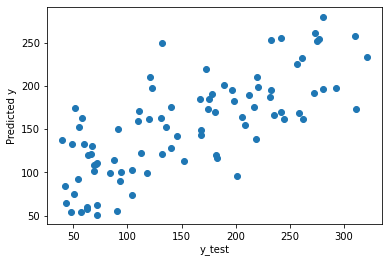

In [253]:
plt.scatter(yt,yhat)
plt.xlabel('y_test')
plt.ylabel('Predicted y')

In [254]:
import sklearn
sklearn.metrics.r2_score(yt,yhat)

0.5502492259658616

**Gradient Descent**

---

Now, I am solving linear regression problem by minimizing the cost: 

$C =  \frac{1}{N} \left \| \mathbf{y} - \mathbf{Xw} \right \|^{2}$


The gradient is:
$\nabla C = -\frac{2}{N} \mathbf{X}^{T}\left ( \mathbf{y} - \mathbf{Xw} \right )$


In [255]:
import numpy as np

class LinearRegression:
  def __init__(self,learning_rate=0.0001, n_iter=500, fit_intercept=True):
    self.learning_rate = learning_rate
    self.n_iter = n_iter
    self.fit_intercept = fit_intercept
    self.weights = []
  
  def fit(self,X,y):
    if self.fit_intercept:
      column_of_ones = np.ones((X.shape[0],1))
      X = np.append(column_of_ones,X,axis=1)
  
    n_samples, n_features = X.shape

    self.weights = np.zeros( (n_features,1), dtype=np.float32 )

    # Gradient descent
    for i in range(self.n_iter):

      y_pred = np.matmul(X, self.weights)

      grad_w = -(2/n_samples) * np.matmul( X.T, (y-y_pred)  )

      self.weights -= self.learning_rate * grad_w


  def predict(self,X):
    if self.fit_intercept:
      column_of_ones = np.ones((X.shape[0],1))
      X = np.append(column_of_ones,X,axis=1)
    
    return np.matmul(X, self.weights)



Coefficients: [[0.000000 -3.742844 -247.762264 520.395997 298.512841 -637.839376
  342.218503 35.404933 168.083838 678.601534 87.564379]]
MSE: 2910.2069332665283
R2 score: 0.0744687502046969


Text(0, 0.5, 'Predicted y')

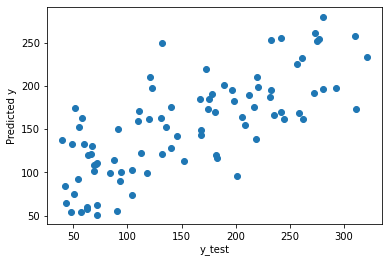

In [257]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

lr_skmodel = linear_model.LinearRegression()

lr_skmodel.fit(X,y)

print('Coefficients:',lr_skmodel.coef_)

y_pred = lr_skmodel.predict(Xt) # compare y_test

print('MSE:',mean_squared_error(y_pred,yt))
# R2 score = 1 - (MSE / (variance of data))
print('R2 score:',r2_score(y_pred,yt))


plt.scatter(yt,y_pred)
plt.xlabel('y_test')
plt.ylabel('Predicted y')

In [258]:
import sklearn
sklearn.metrics.r2_score(yt,yhat)

0.5502492259658616

In [259]:
import numpy as np

class LinearRegression:
  def __init__(self,learning_rate=0.0001, n_iter=500, fit_intercept=True):
    self.learning_rate = learning_rate
    self.n_iter = n_iter
    self.fit_intercept = fit_intercept
    self.weights = []
  
  def fit(self,X,y):
    if self.fit_intercept:
      column_of_ones = np.ones((X.shape[0],1))
      X = np.append(column_of_ones,X,axis=1)
  
    n_samples, n_features = X.shape

    self.weights = np.zeros( (n_features,1), dtype=np.float32 )

    # Gradient descent
    for i in range(self.n_iter):

      y_pred = np.matmul(X, self.weights)

      grad_w = -(2/n_samples) * np.matmul( X.T, (y-y_pred)  )

      self.weights -= self.learning_rate * grad_w


  def predict(self,X):
    if self.fit_intercept:
      column_of_ones = np.ones((X.shape[0],1))
      X = np.append(column_of_ones,X,axis=1)
    
    return np.matmul(X, self.weights)



In [260]:
lrmodel = LinearRegression(learning_rate=0.0005,n_iter=100000,fit_intercept=True)
lrmodel.fit(X,y)
print(lrmodel.weights)


[[75.765945]
 [75.765945]
 [37.187241]
 [-12.957762]
 [154.003891]
 [110.085091]
 [41.531887]
 [29.075857]
 [-98.409035]
 [103.784019]
 [145.793289]
 [93.424103]]


In [261]:
y_pred1 = lrmodel.predict(Xt)

Text(0, 0.5, 'Predicted y')

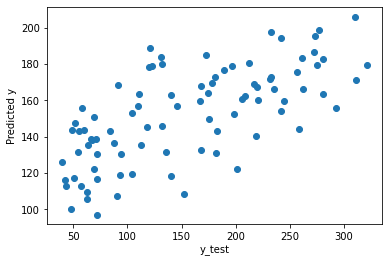

In [263]:
plt.scatter(yt,y_pred1)
plt.xlabel('y_test')
plt.ylabel('Predicted y')

In [264]:
print('MSE:',mean_squared_error(y_pred1,yt))
# R2 score = 1 - (MSE / (variance of data))
print('R2 score:',r2_score(y_pred1,yt))

MSE: 4322.297674447385
R2 score: -5.461138132061364


In [265]:
import sklearn
sklearn.metrics.r2_score(yt,y_pred1)

0.3320211348315707

In [266]:
import matplotlib.pyplot as plt  
def linear_regression(x, y, m_current=0, b_current=0, epochs=10000, learning_rate=0.0001):
    cost_list = []  
    N = float(len(y))
    for i in range(epochs):
        y_current = (m_current * x) + b_current
        cost = sum([data**2 for data in (y-y_current)]) / N
        cost_list.append(cost)     
        m_gradient = -(2/N) * sum(x * (y - y_current))
        b_gradient = -(2/N) * sum(y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        b_current = b_current - (learning_rate * b_gradient)
    return m_current, b_current, cost, cost_list 

m_current, b_current, cost, cost_list = linear_regression(X,y) 


In [267]:
repeat = 10000
lrate = 0.01
theta = np.zeros((10+1))

In [268]:
def computeCost(X, y, theta):
  m = len(y) # number of training examples
  diff = np.matmul(X, theta)-y
  J = 1 / (2 * m) * np.matmul(diff, diff)
  return J

In [269]:
def gradientDescent(X, y, theta, alpha, num_iters):
  # Initialize some useful values
  m = len(y) # number of training examples
  J_history = []
  # repeat until convergance
  for i in range(num_iters):
    hc = np.matmul(X, theta) - y
    theta -= alpha / m . dot(np.matmul(X.transpose(), hc)) 
    # Save the cost J in every iteration
    J_history.append(computeCost(X, y, theta))
  return theta, J_history

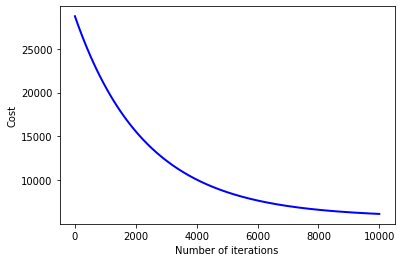

In [272]:
costs=[]
for cost in cost_list:
  costs.append(cost.mean())
plt.plot(np.arange(10000), costs, '-b', LineWidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.show()

**Question 2**

I am downloading sklearn.datasets.fetch_openml(name="house_prices")
dataset and Split it into training (80%) and testing (20%) parts.

After that I used sklearn.linear_model module to get solution and plot the model prediction and actual values on test set and use sklearn.metrics.r2_score to calculate performance.

In [273]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices")
# to do splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


Coefficients: [[0.000000 48.677257 -241.924793 522.394429 316.228880 -724.119525
  460.770283 7.366032 63.694368 737.943529 104.806340]]
MSE: 2595.7884990183557
R2 score: 0.027869589143429963


Text(0, 0.5, 'Predicted y')

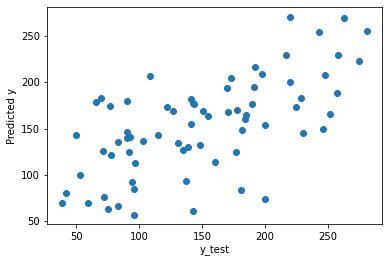

In [275]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

lr_skmodel = linear_model.LinearRegression()

lr_skmodel.fit(X_train,y_train)

print('Coefficients:',lr_skmodel.coef_)

y_pred = lr_skmodel.predict(X_test) # compare y_test

print('MSE:',mean_squared_error(y_pred,y_test))
# R2 score = 1 - (MSE / (variance of data))
print('R2 score:',r2_score(y_pred,y_test))


plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('Predicted y')

In [276]:
import sklearn
sklearn.metrics.r2_score(y_test,y_pred)

0.38192037963462633



---



---


 **End of the Problem Set 1**




**Hessam Kaveh**

**22.10.2022**